In [2]:
import numpy as np 
import pandas as pd 
import os

# Load the dataset to inspect its contents
file_path = 'C:/Users/hp/Downloads/RegressionML/Student_Performance.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structur
data.head()

data.columns = data.columns.str.lower().str.replace(' ', '_')

# 2. Convert "extracurricular_activities" to binary (Yes=1, No=0)
data['extracurricular_activities'] = data['extracurricular_activities'].map({'Yes': 1, 'No': 0})

# Display the cleaned data
print(data.head())

# Export the cleaned dataset if needed
data.to_csv('cleaned_student_performance.csv', index=False)


   hours_studied  previous_scores  extracurricular_activities  sleep_hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   sample_question_papers_practiced  performance_index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


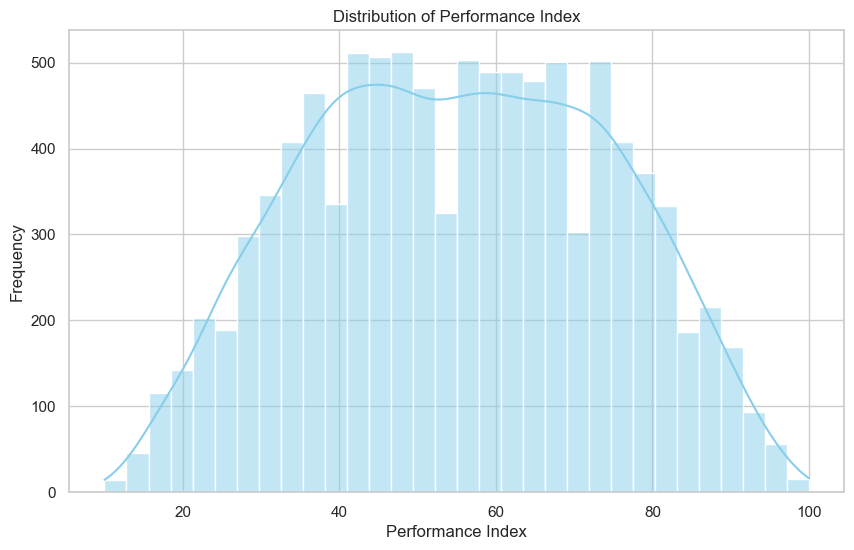

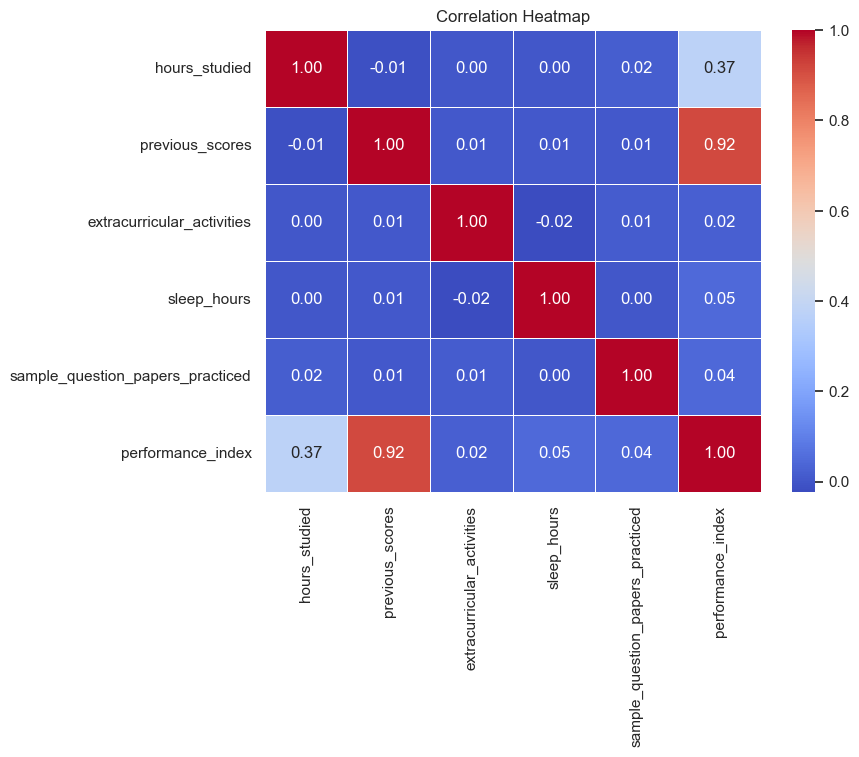

C:\Users\hp\AppData\Local\Temp\ipykernel_29896\3036495741.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hours_studied', y='performance_index', data=data, palette='Set2')


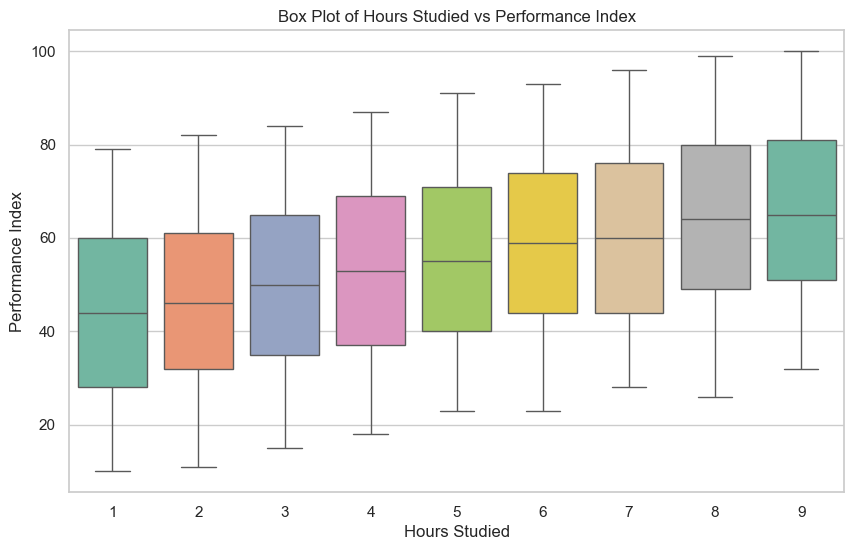

C:\Users\hp\AppData\Local\Temp\ipykernel_29896\3036495741.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='extracurricular_activities', y='performance_index', data=data, palette='Set1')


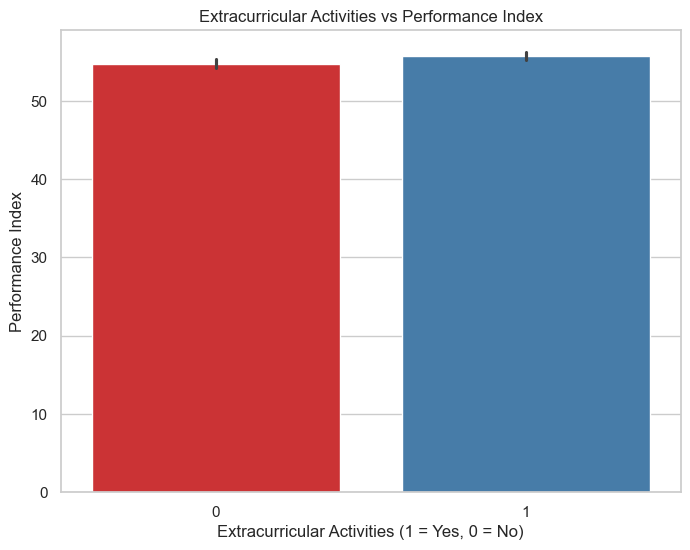

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Distribution of Performance Index
plt.figure(figsize=(10, 6))
sns.histplot(data['performance_index'], kde=True, color='skyblue')
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(8, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 3. Box Plot: Hours Studied vs Performance Index
plt.figure(figsize=(10, 6))
sns.boxplot(x='hours_studied', y='performance_index', data=data, palette='Set2')
plt.title('Box Plot of Hours Studied vs Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

# 4. Bar Plot: Extracurricular Activities vs Performance Index
plt.figure(figsize=(8, 6))
sns.barplot(x='extracurricular_activities', y='performance_index', data=data, palette='Set1')
plt.title('Extracurricular Activities vs Performance Index')
plt.xlabel('Extracurricular Activities (1 = Yes, 0 = No)')
plt.ylabel('Performance Index')
plt.show()


                                  hours_studied  previous_scores  \
hours_studied                          1.000000        -0.012390   
previous_scores                       -0.012390         1.000000   
extracurricular_activities             0.003873         0.008369   
sleep_hours                            0.001245         0.005944   
sample_question_papers_practiced       0.017463         0.007888   
performance_index                      0.373730         0.915189   

                                  extracurricular_activities  sleep_hours  \
hours_studied                                       0.003873     0.001245   
previous_scores                                     0.008369     0.005944   
extracurricular_activities                          1.000000    -0.023284   
sleep_hours                                        -0.023284     1.000000   
sample_question_papers_practiced                    0.013103     0.003990   
performance_index                                   0.024525 

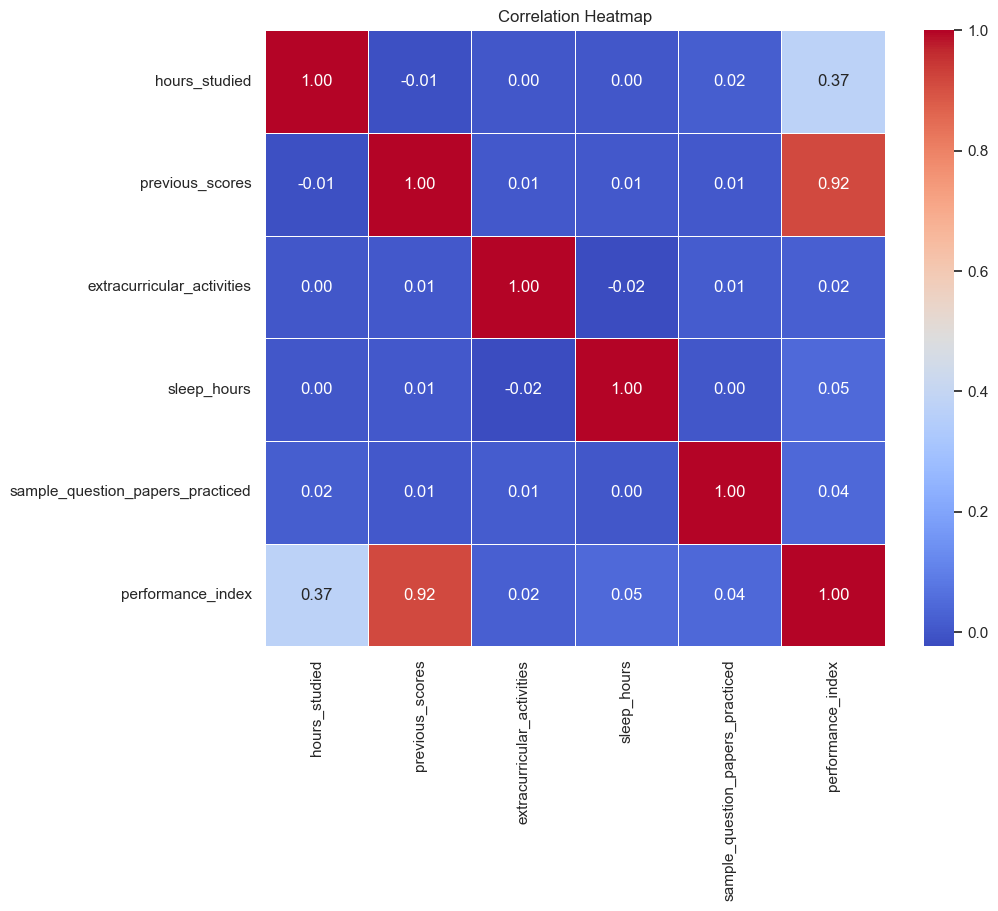

In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = 'cleaned_student_performance.csv'  # Replace with your cleaned file path
data = pd.read_csv(file_path)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
data['study_score_interaction'] = data['hours_studied'] * data['previous_scores']

# 2. Ratio: previous_scores / sleep_hours
data['score_sleep_ratio'] = data['previous_scores'] / (data['sleep_hours'] + 1e-5)  # Add small value to avoid division by zero

# 3. Polynomial term: hours_studied squared
data['hours_studied_squared'] = data['hours_studied'] ** 2


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Prepare the data for training
X = data.drop('performance_index', axis=1)
y = data['performance_index']

# Convert categorical data into numerical form (One-Hot Encoding for 'Extracurricular Activities')
X = pd.get_dummies(X, columns=['extracurricular_activities'], drop_first=True)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")




Mean Squared Error: 4.082464167147605
R² Score: 0.9889837341250705


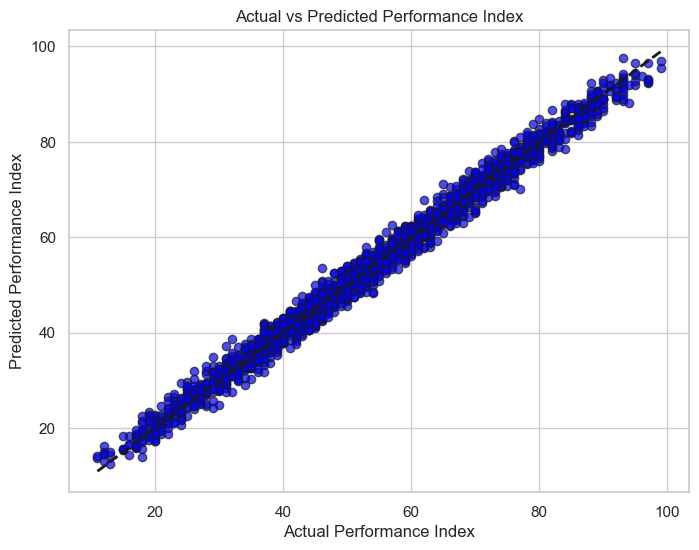

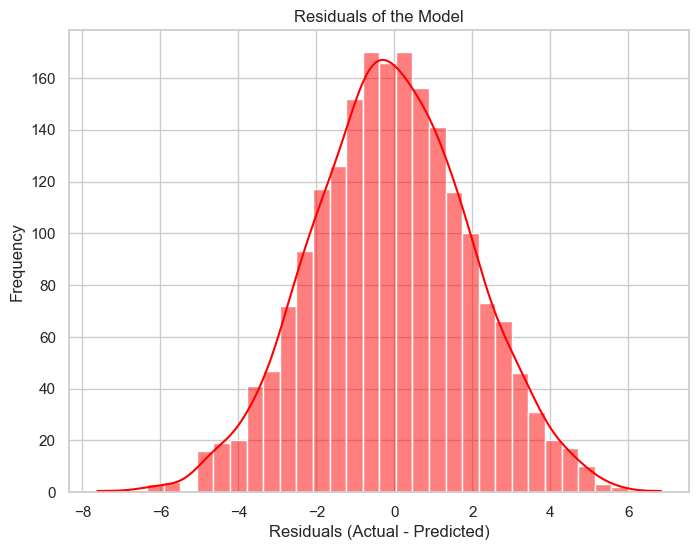

In [6]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Performance Index')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.grid(True)
plt.show()

# Residual Plot: To visualize errors
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='red')
plt.title('Residuals of the Model')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('performance_index', axis=1)
y = data['performance_index']

# Convert categorical data into numerical form (One-Hot Encoding for 'Extracurricular Activities')
X = pd.get_dummies(X, columns=['extracurricular_activities'], drop_first=True)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Ridge Regression with GridSearchCV for hyperparameter tuning
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strength values
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_ridge = ridge_cv.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
best_alpha = ridge_cv.best_params_['alpha']

print(f"Mean Squared Error: {mse_ridge}")
print(f"R² Score: {r2_ridge}")
print(f"Best Alpha (Regularization Strength): {best_alpha}")


Mean Squared Error: 4.082641551310069
R² Score: 0.988983255465365
Best Alpha (Regularization Strength): 0.1


In [20]:
from sklearn.linear_model import Lasso, ElasticNet

# Lasso Regression with GridSearchCV for hyperparameter tuning
lasso = Lasso()
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# ElasticNet Regression with GridSearchCV for hyperparameter tuning
elastic_net = ElasticNet()
param_grid_enet = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.2, 0.5, 0.8]}  # l1_ratio controls the mix of L1 and L2 regularization
elastic_net_cv = GridSearchCV(elastic_net, param_grid_enet, cv=5)
elastic_net_cv.fit(X_train_scaled, y_train)

# Predict on test data for Lasso and ElasticNet
y_pred_lasso = lasso_cv.predict(X_test_scaled)
y_pred_enet = elastic_net_cv.predict(X_test_scaled)

# Calculate performance metrics for all models
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
best_alpha_lasso = lasso_cv.best_params_['alpha']

mse_enet = mean_squared_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)
best_params_enet = elastic_net_cv.best_params_

# Store the results for comparison
results = {
    "Linear Regression (Baseline)": {
        "MSE": mse,
        "R²": r2
    },
    "Ridge Regression": {
        "MSE": mse_ridge,
        "R²": r2_ridge,
        "Best Alpha": best_alpha
    },
    "Lasso Regression": {
        "MSE": mse_lasso,
        "R²": r2_lasso,
        "Best Alpha": best_alpha_lasso
    },
    "ElasticNet Regression": {
        "MSE": mse_enet,
        "R²": r2_enet,
        "Best Params": best_params_enet
    }
}

results


{'Linear Regression (Baseline)': {'MSE': 4.082464167147605,
  'R²': 0.9889837341250705},
 'Ridge Regression': {'MSE': 4.082641551310069,
  'R²': 0.988983255465365,
  'Best Alpha': 0.1},
 'Lasso Regression': {'MSE': 4.0877338483578995,
  'R²': 0.9889695142306851,
  'Best Alpha': 0.01},
 'ElasticNet Regression': {'MSE': 4.131765644408866,
  'R²': 0.988850697272988,
  'Best Params': {'alpha': 0.01, 'l1_ratio': 0.8}}}

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Prepare the data
X = data.drop('performance_index', axis=1)
y = data['performance_index']

# Convert categorical data (e.g., 'Extracurricular Activities') into numerical form
X = pd.get_dummies(X, columns=['extracurricular_activities'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Ridge Regression model
ridge = Ridge()

# Set up hyperparameter grid for tuning alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV for hyperparameter tuning
ridge_cv = GridSearchCV(ridge, param_grid, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_cv.predict(X_test_scaled)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
best_alpha = ridge_cv.best_params_['alpha']

# Output the results
print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"R² Score (Ridge): {r2_ridge}")
print(f"Best Alpha (Ridge): {best_alpha}")

Mean Squared Error (Ridge): 4.082641551310069
R² Score (Ridge): 0.988983255465365
Best Alpha (Ridge): 0.1


<Figure size 1000x600 with 0 Axes>

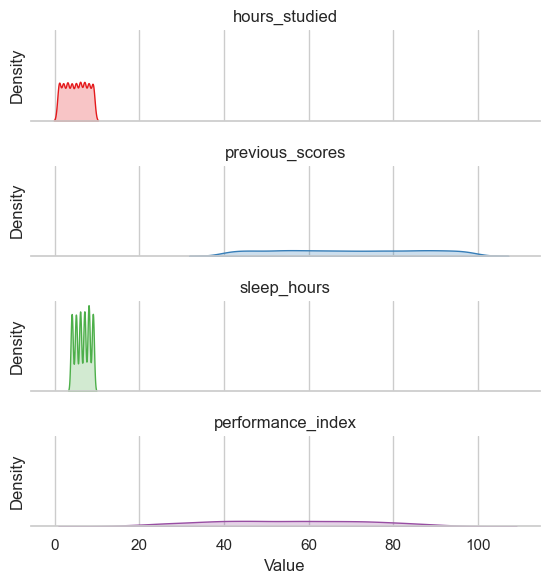

In [24]:
data_numeric = data[['hours_studied', 'previous_scores', 'sleep_hours', 'performance_index']]

# Convert the data to numeric, forcing invalid parsing to NaN
data_numeric_clean = data_numeric.apply(pd.to_numeric, errors='coerce')

# Melt the cleaned data for plotting
melted_data_clean = data_numeric_clean.melt(var_name='Feature', value_name='Value')

# Create the ridge plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
g = sns.FacetGrid(melted_data_clean, row="Feature", hue="Feature", aspect=4, height=1.5, palette="Set1")

# Add density plots for each feature
g.map(sns.kdeplot, "Value", fill=True)

# Remove axes labels for a cleaner look
g.set_titles("{row_name}")
g.set(yticks=[])
g.despine(left=True)

# Adjust spacing between plots
plt.subplots_adjust(hspace=0.5)
plt.show()